In [65]:
#1
import tensorflow as tf

def f(x):
  x2i = x[::2]
  x2im1 = x[1::2]
  return tf.reduce_sum(100 * (x2im1**2 - x2i)**2 + (x2im1 - 1)**2)

x = tf.random.uniform([12])
print(f(x))



tf.Tensor(147.32379, shape=(), dtype=float32)


In [67]:
x=tf.Variable(x)
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001)
def train_step():
  with tf.GradientTape() as tape:
   loss=f(x)
  grads=tape.gradient(loss,x)
  optimizer.apply_gradients(zip([grads],[x]))
for iteration in range(10000):
  train_step()
print(x)
print(f(x))

<tf.Variable 'Variable:0' shape=(12,) dtype=float32, numpy=
array([0.9991767, 1.0003382, 1.0001767, 0.9993382, 1.0001767, 0.9993382,
       0.9991767, 1.0003382, 0.9991767, 1.0003382, 0.9991767, 1.0003382],
      dtype=float32)>
tf.Tensor(0.0013510304, shape=(), dtype=float32)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0392 - accuracy: 0.7212
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3586 - accuracy: 0.8998
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3011 - accuracy: 0.9165
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.9247
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2441 - accuracy: 0.9321
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2227 - accuracy: 0.9379
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2085 - accuracy: 0.9417
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1938 - accuracy: 0.9458
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1876 - accuracy: 0.9481
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.1688 

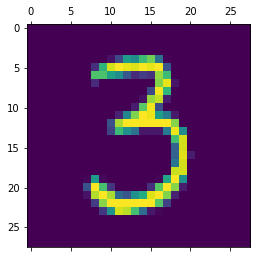

In [68]:
#2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train = x_train[:,np.newaxis] / 255.0

x_test = x_test[:,np.newaxis] / 255.0



# Show one data point
plt.matshow(x_train[50].reshape(28, 28))

x_train=x_train.reshape(60000,784)
y_train=y_train.reshape(60000,1)
x_test=x_test.reshape(10000,784)
y_test=y_test.reshape(10000,1)


model = keras.Sequential([
    keras.layers.Dense(128, 'relu'),
    keras.layers.Dense(10, 'softmax')
])

model.compile(optimizer="sgd",loss='sparse_categorical_crossentropy', metrics = ["accuracy"])
model.fit(x_train, y_train, epochs=10)

# Evaluation

test_loss,test_acc=model.evaluate(x=x_test,y=y_test)
print('\nTest accuracy:',test_acc)

In [69]:
#3
import numpy as np
class MDP():
  def __init__(self):
    self.γ = 0.9960
    self.A = [0, 1]
    self.S = [0, 1, 2, 3, 4]

    P0 = np.array([[0.5, .15, .15, 0, .20],
                   [0, .5, .0, .25, .25],
                   [0, 0, .15, .05, .8],
                   [0, 0, 0, 0, 1],
                   [0, 0, 0, 0, 1]])

    R0 = np.array([0, 0, 0, 10, 0])

    P1 = np.array([[0.5, .25, .15, 0, .10],
                   [0, .5, .0, .35, .15],
                   [0, 0, .20, .05, .75],
                   [0, 0, 0, 0, 1],
                   [0, 0, 0, 0, 1]])

    R1 = np.array([-0.1, -0.1, -0.1, 10, 0])

    self.P = [P0, P1]
    self.R = [R0, R1]

  def step(self, s, a):
    s_prime = np.random.choice(len(self.S), p=self.P[a][s])
    R = self.R[a][s]
    if s_prime == 4:
      done = True
    else:
      done = False
    return s_prime, R, done

  def simulate(self, s, a, π):
    done = False
    t = 0
    history = []
    while not done:
      if t > 0:
        a = π[s]
      s_prime, R, done = self.step(s, a)
      history.append((s, a, R))
      s = s_prime
      t += 1

    return history

mdp = MDP()

# Estimating vπ
S = np.zeros(5)
q = np.zeros((5, 2))


s = 1
α = 0.001
ϵ = 0.01


def ε_greedy(q, s, ε=0.1):
  a = np.argmax(q[s])

  # Draw a random uniform
  u = np.random.uniform()
  if u < ε:
    a = np.random.randint(2)
  return a


for iteration in range(10000000):
    # Choose action for today:
    a = ε_greedy(q, s, ε=ε)
    s_prime, R, done = mdp.step(s, a)

    # SARSA update
    #a_prime = ε_greedy(q, s_prime, ε=ε)
    #TD_target = R + mdp.γ * q[s_prime, a_prime]

    # Q-learning upate
    TD_target = R + mdp.γ * np.max(q[s_prime, :])

    δ = TD_target - q[s, a]

    # TD update
    q[s, a] = q[s, a] + α * δ

    if done:
      s = 0
    else:
      s = s_prime

    if iteration % 100000 == 0:
      print(q)


[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1.70720541 0.39171893]
 [4.88406282 0.42082047]
 [0.61688805 0.02646061]
 [9.95445759 0.21770533]
 [0.         0.        ]]
[[1.61023497 0.83175807]
 [4.7697639  0.88171296]
 [0.57733347 0.05200579]
 [9.9997659  0.46889103]
 [0.         0.        ]]
[[1.65274188 1.18956531]
 [4.86606913 1.51036965]
 [0.58537637 0.07983717]
 [9.99999893 0.69502625]
 [0.         0.        ]]
[[ 1.752868    1.40984897]
 [ 5.14013636  1.87206953]
 [ 0.59099325  0.08656135]
 [10.          0.97016532]
 [ 0.          0.        ]]
[[ 1.72331637  1.54979492]
 [ 4.89908823  2.2841586 ]
 [ 0.57557849  0.09973191]
 [10.          1.20202967]
 [ 0.          0.        ]]
[[ 1.63184517  2.4979231 ]
 [ 5.01909976  2.65679371]
 [ 0.56995875  0.12416581]
 [10.          1.51327619]
 [ 0.          0.        ]]
[[ 1.73877292  2.41306856]
 [ 4.87228384  3.04816846]
 [ 0.57390834  0.13781688]
 [10.          1.77245618]
 [ 0.          0.        ]]
[[ 1.81614705  2.56979892]
 [ 5.

In [60]:
#4
mdp = MDP()
P = mdp.P
R = mdp.R
A = mdp.A
S = mdp.S
γ = mdp.γ

# Evaluating arbitrary policies
def construct_Rπ(R, π, S):
  Rπ = np.zeros(len(S))
  for s in S:
    Rπ[s] = R[π[s]][s]
  return Rπ


def construct_Pπ(P, π, S):
  Pπ = np.zeros((len(S), len(S)))
  for s in S:
    for s_prime in S:
      Pπ[s, s_prime] = P[π[s]][s, s_prime]
  return Pπ


def policy_evaluation(π, S, P, R, γ):
    Rπ = construct_Rπ(R, π, S)
    Pπ = construct_Pπ(P, π, S)
    v0 = np.zeros(len(S))
    for iteration in range(10000):
        v1 = Rπ + γ * Pπ @ v0
        error = np.abs(v1 - v0).max()
        if error < 1e-10:
            break
        v0 = v1
    return v0

def policy_improvement(π, vπ):
    Qπ = construct_Qπ(P, π, vπ)
    π_prime = np.argmax(Qπ, axis=1)
    return π_prime

def construct_Qπ(P, π, vπ):
  Qπ = np.zeros((len(S), len(A)))
  for s in S:
    for a in A:
      Qπ[s, a] = R[a][s] + γ * P[a][s] @ vπ
  return Qπ

# Evaluate the policy π = [0, 1, 0]
π = [0,0,0,0,0]
for iteration in range(2000):
  vπ = policy_evaluation(π, S, P, R, γ)
  π=policy_improvement(π, vπ)
Qπ = construct_Qπ(P, π, vπ)
print(π)
print(Qπ)
print(vπ)

[1 1 0 0 0]
[[ 2.7488714   3.32067538]
 [ 5.84901992  6.74501992]
 [ 0.58546908  0.51462544]
 [10.         10.        ]
 [ 0.          0.        ]]
[ 3.32067538  6.74501992  0.58546908 10.          0.        ]
